In [3]:
import os
import numpy as np
import pandas as pd

# Dataset per speech

## Loading the cleaned data

In [4]:
speeches1 = pd.read_parquet("https://github.com/Mlad-en/Intro_Data_Science/raw/main/cleaned_data/combined_data_2013_2023.parquet")

## Drop rows we dont need

In [7]:
speeches1 = speeches1[['country_name', 'iso_3', 'year', 'text']]

In [8]:
speeches1

,country_name,iso_3,year,text
0,Afghanistan,AFG,2013,I bring to all warm \ngreetings and the good w...
1,Norway,NOR,2023,None
2,Afghanistan,AFG,2014,It gives me \ngreat pleasure to express my sin...
3,Norway,NOR,2022,We live in challenging times indeed. As a glob...
4,Ireland,IRL,2023,None
...,...,...,...,...
1937,Zambia,ZMB,2017,Let me join previous speakers in congratulatin...
1938,Zambia,ZMB,2018,Let me join other world leaders in con...
1939,Zambia,ZMB,2019,Let me join previous speakers in congratulatin...
1940,Zambia,ZMB,2020,"Your excellency Mr. Volkan Bozkir, President o..."


## Add climate change data

In [11]:
df_climate = pd.read_csv('co-emissions-per-capita.csv', sep=",")

In [32]:
df_climate = df_climate.rename(columns={'Code':'iso_3', 'Year':'year'})

In [33]:
df_climate

,Entity,iso_3,year,Annual CO₂ emissions (per capita)
0,Afghanistan,AFG,1949,0.001992
1,Afghanistan,AFG,1950,0.011266
2,Afghanistan,AFG,1951,0.012098
3,Afghanistan,AFG,1952,0.011946
4,Afghanistan,AFG,1953,0.013685
...,...,...,...,...
26910,Zimbabwe,ZWE,2017,0.650533
26911,Zimbabwe,ZWE,2018,0.783639
26912,Zimbabwe,ZWE,2019,0.723861
26913,Zimbabwe,ZWE,2020,0.676970


## Add codes data set for regions

In [34]:
df_codes = pd.read_csv('UNSD — Methodology.csv', sep=";")

In [35]:
df_codes = df_codes[['Region Name', 'Sub-region Name', 'ISO-alpha3 Code' ]].rename(columns={'ISO-alpha3 Code':'iso_3'})

In [36]:
df_codes

,Region Name,Sub-region Name,iso_3
0,Africa,Northern Africa,DZA
1,Africa,Northern Africa,EGY
2,Africa,Northern Africa,LBY
3,Africa,Northern Africa,MAR
4,Africa,Northern Africa,SDN
...,...,...,...
243,Oceania,Polynesia,WSM
244,Oceania,Polynesia,TKL
245,Oceania,Polynesia,TON
246,Oceania,Polynesia,TUV


In [37]:
df1c =  pd.merge(df_codes, speeches1, how="right", on="iso_3") 

In [40]:
df1 = pd.merge(df1c, df_climate ,on=["iso_3", 'year'])

In [41]:
df1

,Region Name,Sub-region Name,iso_3,country_name,year,text,Entity,Annual CO₂ emissions (per capita)
0,Asia,Southern Asia,AFG,Afghanistan,2013,I bring to all warm \ngreetings and the good w...,Afghanistan,0.293283
1,Asia,Southern Asia,AFG,Afghanistan,2014,It gives me \ngreat pleasure to express my sin...,Afghanistan,0.280299
2,Asia,Southern Asia,AFG,Afghanistan,2015,"It gives me great pleasure, on behalf of the I...",Afghanistan,0.290076
3,Asia,Southern Asia,AFG,Afghanistan,2016,It is my distinct pleasure to attend the seven...,Afghanistan,0.261795
4,Asia,Southern Asia,AFG,Afghanistan,2017,As I stand here before the General Assembly to...,Afghanistan,0.276853
...,...,...,...,...,...,...,...,...
1572,Africa,Sub-Saharan Africa,ZMB,Zambia,2017,Let me join previous speakers in congratulatin...,Zambia,0.395586
1573,Africa,Sub-Saharan Africa,ZMB,Zambia,2018,Let me join other world leaders in con...,Zambia,0.415569
1574,Africa,Sub-Saharan Africa,ZMB,Zambia,2019,Let me join previous speakers in congratulatin...,Zambia,0.421489
1575,Africa,Sub-Saharan Africa,ZMB,Zambia,2020,"Your excellency Mr. Volkan Bozkir, President o...",Zambia,0.384656


## Sentiment analyzer

### Drop the none values of text

In [42]:
df1 = df1[df1['text'].notna()]

In [43]:
df1

,Region Name,Sub-region Name,iso_3,country_name,year,text,Entity,Annual CO₂ emissions (per capita)
0,Asia,Southern Asia,AFG,Afghanistan,2013,I bring to all warm \ngreetings and the good w...,Afghanistan,0.293283
1,Asia,Southern Asia,AFG,Afghanistan,2014,It gives me \ngreat pleasure to express my sin...,Afghanistan,0.280299
2,Asia,Southern Asia,AFG,Afghanistan,2015,"It gives me great pleasure, on behalf of the I...",Afghanistan,0.290076
3,Asia,Southern Asia,AFG,Afghanistan,2016,It is my distinct pleasure to attend the seven...,Afghanistan,0.261795
4,Asia,Southern Asia,AFG,Afghanistan,2017,As I stand here before the General Assembly to...,Afghanistan,0.276853
...,...,...,...,...,...,...,...,...
1572,Africa,Sub-Saharan Africa,ZMB,Zambia,2017,Let me join previous speakers in congratulatin...,Zambia,0.395586
1573,Africa,Sub-Saharan Africa,ZMB,Zambia,2018,Let me join other world leaders in con...,Zambia,0.415569
1574,Africa,Sub-Saharan Africa,ZMB,Zambia,2019,Let me join previous speakers in congratulatin...,Zambia,0.421489
1575,Africa,Sub-Saharan Africa,ZMB,Zambia,2020,"Your excellency Mr. Volkan Bozkir, President o...",Zambia,0.384656


### Import and add to dataframe

In [44]:
import nltk
# nltk.download('vader_lexicon')

In [45]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [46]:
df1['sentiment'] = [sia.polarity_scores(speech)['compound'] for speech in df1['text']]

C:\Users\easto\AppData\Local\Temp\ipykernel_35192\2943127738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['sentiment'] = [sia.polarity_scores(speech)['compound'] for speech in df1['text']]


In [48]:
df1

,Region Name,Sub-region Name,iso_3,country_name,year,text,Entity,Annual CO₂ emissions (per capita),sentiment
0,Asia,Southern Asia,AFG,Afghanistan,2013,I bring to all warm \ngreetings and the good w...,Afghanistan,0.293283,0.9999
1,Asia,Southern Asia,AFG,Afghanistan,2014,It gives me \ngreat pleasure to express my sin...,Afghanistan,0.280299,0.9996
2,Asia,Southern Asia,AFG,Afghanistan,2015,"It gives me great pleasure, on behalf of the I...",Afghanistan,0.290076,0.9993
3,Asia,Southern Asia,AFG,Afghanistan,2016,It is my distinct pleasure to attend the seven...,Afghanistan,0.261795,0.9998
4,Asia,Southern Asia,AFG,Afghanistan,2017,As I stand here before the General Assembly to...,Afghanistan,0.276853,0.2976
...,...,...,...,...,...,...,...,...,...
1572,Africa,Sub-Saharan Africa,ZMB,Zambia,2017,Let me join previous speakers in congratulatin...,Zambia,0.395586,0.9995
1573,Africa,Sub-Saharan Africa,ZMB,Zambia,2018,Let me join other world leaders in con...,Zambia,0.415569,0.9998
1574,Africa,Sub-Saharan Africa,ZMB,Zambia,2019,Let me join previous speakers in congratulatin...,Zambia,0.421489,0.9994
1575,Africa,Sub-Saharan Africa,ZMB,Zambia,2020,"Your excellency Mr. Volkan Bozkir, President o...",Zambia,0.384656,0.9989


# Keep rows with speech about climate change

## Remove punctuation

In [49]:
# Load the regular expression library
import re
# Remove punctuation
df1['text_processed'] = \
df1['text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase

df1['text_processed'].map(lambda x: x.lower())

C:\Users\easto\AppData\Local\Temp\ipykernel_35192\1374494662.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['text_processed'] = \


0       i bring to all warm \ngreetings and the good w...
1       it gives me \ngreat pleasure to express my sin...
2       it gives me great pleasure on behalf of the is...
3       it is my distinct pleasure to attend the seven...
4       as i stand here before the general assembly to...
                              ...                        
1572    let me join previous speakers in congratulatin...
1573    let me join other  world leaders    in     con...
1574    let me join previous speakers in congratulatin...
1575    your excellency mr volkan bozkir president of ...
1576    i wish to begin by congratulating his excellen...
Name: text_processed, Length: 1552, dtype: object

## Keep speeches about climate change

In [50]:
mask = df1.text_processed.str.contains('climate') |    \
                df1.text_processed.str.contains('climate change') | \
                df1.text_processed.str.contains('global warming')

df1_climate = df1.loc[mask]

In [51]:
df1_climate

,Region Name,Sub-region Name,iso_3,country_name,year,text,Entity,Annual CO₂ emissions (per capita),sentiment,text_processed
3,Asia,Southern Asia,AFG,Afghanistan,2016,It is my distinct pleasure to attend the seven...,Afghanistan,0.261795,0.9998,It is my distinct pleasure to attend the seven...
5,Asia,Southern Asia,AFG,Afghanistan,2018,Allow me to start by extending my congratulati...,Afghanistan,0.294876,0.9996,Allow me to start by extending my congratulati...
6,Asia,Southern Asia,AFG,Afghanistan,2019,It is an honour for me to and stand at this pr...,Afghanistan,0.293401,0.9998,It is an honour for me to and stand at this pr...
7,Asia,Southern Asia,AFG,Afghanistan,2020,"Bismillah Rahman-ur-Rahim\nMr. President, ladi...",Afghanistan,0.299746,0.9995,Bismillah Rahman-ur-Rahim\nMr President ladies...
11,Europe,Southern Europe,ALB,Albania,2015,"One year ago, Pope Francis began his visits ar...",Albania,1.634750,0.9987,One year ago Pope Francis began his visits aro...
...,...,...,...,...,...,...,...,...,...,...
1571,Africa,Sub-Saharan Africa,ZMB,Zambia,2016,It is indeed a great honour and privilege for ...,Zambia,0.349328,0.9999,It is indeed a great honour and privilege for ...
1572,Africa,Sub-Saharan Africa,ZMB,Zambia,2017,Let me join previous speakers in congratulatin...,Zambia,0.395586,0.9995,Let me join previous speakers in congratulatin...
1573,Africa,Sub-Saharan Africa,ZMB,Zambia,2018,Let me join other world leaders in con...,Zambia,0.415569,0.9998,Let me join other world leaders in con...
1574,Africa,Sub-Saharan Africa,ZMB,Zambia,2019,Let me join previous speakers in congratulatin...,Zambia,0.421489,0.9994,Let me join previous speakers in congratulatin...


### Very small analysis

C:\Users\easto\AppData\Local\Temp\ipykernel_35192\983041121.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1_climate.groupby(['Region Name', 'year']).mean()['sentiment'].unstack(level=0).iloc[:,:10].plot()


<Axes: xlabel='year'>

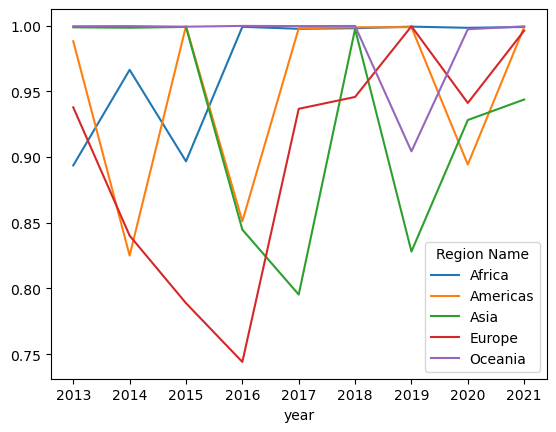

In [52]:
df1_climate.groupby(['Region Name', 'year']).mean()['sentiment'].unstack(level=0).iloc[:,:10].plot()

# Dataset per paragraph of speech

## Loading the cleaned data

In [53]:
speeches2 = pd.read_parquet("https://github.com/Mlad-en/Intro_Data_Science/raw/main/cleaned_data/combined_data_2013_2022_per_paragraph.parquet")

## Drop columns we dont need

In [55]:
speeches2 = speeches2[['country_name', 'iso_3', 'year', 'text_split']]

## Combine with regions

In [56]:
df2c =  pd.merge(df_codes, speeches2, how="right", on="iso_3") 
df2 = pd.merge(df2c, df_climate, how="right", on=["iso_3", "year"])

In [57]:
df2

,Region Name,Sub-region Name,iso_3,country_name,year,text_split,Entity,Annual CO₂ emissions (per capita)
0,NaN,NaN,AFG,NaN,1949,NaN,Afghanistan,0.001992
1,NaN,NaN,AFG,NaN,1950,NaN,Afghanistan,0.011266
2,NaN,NaN,AFG,NaN,1951,NaN,Afghanistan,0.012098
3,NaN,NaN,AFG,NaN,1952,NaN,Afghanistan,0.011946
4,NaN,NaN,AFG,NaN,1953,NaN,Afghanistan,0.013685
...,...,...,...,...,...,...,...,...
62742,Africa,Sub-Saharan Africa,ZWE,Zimbabwe,2021,The recent adoption of the resolution establis...,Zimbabwe,0.706293
62743,Africa,Sub-Saharan Africa,ZWE,Zimbabwe,2021,Respecting and upholding human rights is the o...,Zimbabwe,0.706293
62744,Africa,Sub-Saharan Africa,ZWE,Zimbabwe,2021,"Mr. President,\nBased on the principles of sov...",Zimbabwe,0.706293
62745,Africa,Sub-Saharan Africa,ZWE,Zimbabwe,2021,"Finally, the increased challenges facing the w...",Zimbabwe,0.706293


## Sentiment analyzer

### Drop None values of text

In [58]:
df2 = df2[df2['text_split'].notna()]

In [59]:
import re
# Remove punctuation
df2['text_processed'] = \
df2['text_split'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
# df2['text_processed'] = \
df2['text_processed'].map(lambda x: x.lower())

C:\Users\easto\AppData\Local\Temp\ipykernel_35192\3624242431.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['text_processed'] = \


64       afghanistan i therefore think that it is usefu...
65       i should like to share two contrasting picture...
66       states-led international military coalition th...
67       exploiting the vacuum and internal strife crea...
68       taliban regime until the 9/11 terrorist attack...
                               ...                        
62742    the recent adoption of the resolution establis...
62743    respecting and upholding human rights is the o...
62744    mr president\nbased on the principles of sover...
62745    finally the increased challenges facing the wo...
62746                                        i thank you\n
Name: text_processed, Length: 37364, dtype: object

In [60]:
df2

,Region Name,Sub-region Name,iso_3,country_name,year,text_split,Entity,Annual CO₂ emissions (per capita),text_processed
64,Asia,Southern Asia,AFG,Afghanistan,2013,Afghanistan. I therefore think that it is usef...,Afghanistan,0.293283,Afghanistan I therefore think that it is usefu...
65,Asia,Southern Asia,AFG,Afghanistan,2013,I should like to share two contrasting picture...,Afghanistan,0.293283,I should like to share two contrasting picture...
66,Asia,Southern Asia,AFG,Afghanistan,2013,"States-led international military coalition, t...",Afghanistan,0.293283,States-led international military coalition th...
67,Asia,Southern Asia,AFG,Afghanistan,2013,Exploiting the vacuum and internal strife crea...,Afghanistan,0.293283,Exploiting the vacuum and internal strife crea...
68,Asia,Southern Asia,AFG,Afghanistan,2013,Taliban regime until the 9/11 terrorist attack...,Afghanistan,0.293283,Taliban regime until the 9/11 terrorist attack...
...,...,...,...,...,...,...,...,...,...
62742,Africa,Sub-Saharan Africa,ZWE,Zimbabwe,2021,The recent adoption of the resolution establis...,Zimbabwe,0.706293,The recent adoption of the resolution establis...
62743,Africa,Sub-Saharan Africa,ZWE,Zimbabwe,2021,Respecting and upholding human rights is the o...,Zimbabwe,0.706293,Respecting and upholding human rights is the o...
62744,Africa,Sub-Saharan Africa,ZWE,Zimbabwe,2021,"Mr. President,\nBased on the principles of sov...",Zimbabwe,0.706293,Mr President\nBased on the principles of sover...
62745,Africa,Sub-Saharan Africa,ZWE,Zimbabwe,2021,"Finally, the increased challenges facing the w...",Zimbabwe,0.706293,Finally the increased challenges facing the wo...


### Add sentiment score

In [61]:
df2['sentiment'] = [sia.polarity_scores(speech)['compound'] for speech in df2['text_processed']]

C:\Users\easto\AppData\Local\Temp\ipykernel_35192\3693869641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['sentiment'] = [sia.polarity_scores(speech)['compound'] for speech in df2['text_processed']]


In [62]:
df2

,Region Name,Sub-region Name,iso_3,country_name,year,text_split,Entity,Annual CO₂ emissions (per capita),text_processed,sentiment
64,Asia,Southern Asia,AFG,Afghanistan,2013,Afghanistan. I therefore think that it is usef...,Afghanistan,0.293283,Afghanistan I therefore think that it is usefu...,0.9803
65,Asia,Southern Asia,AFG,Afghanistan,2013,I should like to share two contrasting picture...,Afghanistan,0.293283,I should like to share two contrasting picture...,0.5267
66,Asia,Southern Asia,AFG,Afghanistan,2013,"States-led international military coalition, t...",Afghanistan,0.293283,States-led international military coalition th...,-0.9716
67,Asia,Southern Asia,AFG,Afghanistan,2013,Exploiting the vacuum and internal strife crea...,Afghanistan,0.293283,Exploiting the vacuum and internal strife crea...,-0.9595
68,Asia,Southern Asia,AFG,Afghanistan,2013,Taliban regime until the 9/11 terrorist attack...,Afghanistan,0.293283,Taliban regime until the 9/11 terrorist attack...,-0.8225
...,...,...,...,...,...,...,...,...,...,...
62742,Africa,Sub-Saharan Africa,ZWE,Zimbabwe,2021,The recent adoption of the resolution establis...,Zimbabwe,0.706293,The recent adoption of the resolution establis...,0.8720
62743,Africa,Sub-Saharan Africa,ZWE,Zimbabwe,2021,Respecting and upholding human rights is the o...,Zimbabwe,0.706293,Respecting and upholding human rights is the o...,0.9022
62744,Africa,Sub-Saharan Africa,ZWE,Zimbabwe,2021,"Mr. President,\nBased on the principles of sov...",Zimbabwe,0.706293,Mr President\nBased on the principles of sover...,0.9349
62745,Africa,Sub-Saharan Africa,ZWE,Zimbabwe,2021,"Finally, the increased challenges facing the w...",Zimbabwe,0.706293,Finally the increased challenges facing the wo...,0.9607


## Keep only speeches about climate change

In [63]:
mask = df2.text_processed.str.contains('climate') |    \
                df2.text_processed.str.contains('climate change') | \
                df2.text_processed.str.contains('global warming')

df2_climate = df2.loc[mask]

### Very small analysis

C:\Users\easto\AppData\Local\Temp\ipykernel_35192\1612837842.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2_climate.groupby(['Region Name', 'year']).mean()['sentiment'].unstack(level=0).iloc[:,:10].plot()


<Axes: xlabel='year'>

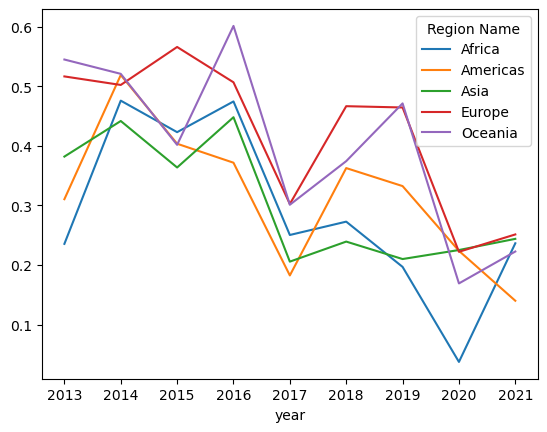

In [64]:
df2_climate.groupby(['Region Name', 'year']).mean()['sentiment'].unstack(level=0).iloc[:,:10].plot()

# Save dataframes

In [66]:
df1_climate.to_parquet('Sentiment_data_climate.parquet')

In [67]:
df2_climate.to_parquet('Sentiment_data_climate_per_paragraph.parquet')

# Exploratory Data Analysis (EDA)

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

## Exploring the data: "To what extent can the press freedom score of a country say something about the sentiment of speeches during the UN General Debate?"

In this part we will perform exploratory analysis based on our exploratory research question as states above. 

First we will examine the correlations between the level of sentiment over the years and the corruption scores / global scores. 

### Sentiment & Corruption

Lets see the correlations between sentiment score and corruption score when we use DF2:

In [68]:
# Group by country_name and year, calculate mean sentiment score
grouped_sentiment_data = df2_climate.groupby(['country_name', 'year'])['sentiment'].mean().reset_index()

# DataFrame with mean sentiment score for each country and year
grouped_sentiment_data.head()

,country_name,year,sentiment
0,Afghanistan,2018,-0.266200
1,Afghanistan,2019,-0.237433
2,Afghanistan,2020,-0.448050
3,Albania,2015,0.959500
4,Albania,2016,0.943700


In [70]:
# Group by country_name and year, calculate mean corruption score
grouped_corruption_data = df2_climate.groupby(['country_name', 'year'])['Annual CO₂ emissions (per capita)'].mean().reset_index()

# DataFrame with mean corruption score for each country and year
grouped_corruption_data.head()

,country_name,year,Annual CO₂ emissions (per capita)
0,Afghanistan,2018,0.294876
1,Afghanistan,2019,0.293401
2,Afghanistan,2020,0.299746
3,Albania,2015,1.634750
4,Albania,2016,1.607731


In [71]:
# Merge DataFrames on 'country_name' and 'year'
merged_df = pd.merge(grouped_sentiment_data, grouped_corruption_data, on=['country_name', 'year'])
merged_df.head()

,country_name,year,sentiment,Annual CO₂ emissions (per capita)
0,Afghanistan,2018,-0.266200,0.294876
1,Afghanistan,2019,-0.237433,0.293401
2,Afghanistan,2020,-0.448050,0.299746
3,Albania,2015,0.959500,1.634750
4,Albania,2016,0.943700,1.607731


In [72]:
# Calculate overall correlation
correlation = merged_df['sentiment'].corr(merged_df['Annual CO₂ emissions (per capita)'])
correlation

0.06906449724339228

In [73]:
# Calculate correlation for each year
correlations_by_year = merged_df.groupby('year')[['sentiment', 'Annual CO₂ emissions (per capita)']].corr().iloc[0::2,-1].reset_index()
correlations_by_year.rename(columns={'corruption_scores': 'correlation'}, inplace=True)

# Plotting correlation development over the years
plt.plot(correlations_by_year['year'], correlations_by_year['correlation'], marker='o')
plt.xlabel('Year')
plt.ylabel('Correlation')
plt.title('Correlation between Sentiment and Corruption Scores by Year')
plt.show()

KeyError: 'correlation'

In [41]:
# Print the correlation values for each year
print("Correlation between Sentiment and Corruption Scores by Year:")
print(correlations_by_year)

Correlation between Sentiment and Corruption Scores by Year:
   year    level_1  correlation
0  2013  sentiment     0.052011
1  2014  sentiment    -0.177960
2  2015  sentiment    -0.118011
3  2016  sentiment     0.023574
4  2017  sentiment     0.148893
5  2018  sentiment    -0.078584
6  2019  sentiment     0.105237
7  2020  sentiment    -0.075442
8  2021  sentiment    -0.037608
9  2022  sentiment    -0.250900


### 2.2. Sentiment & Global FOP Scores

In [42]:
# DataFrame with mean sentiment score for each country and year
grouped_sentiment_data.head()

,country_name,year,sentiment
0,Afghanistan,2013,0.433078
1,Afghanistan,2014,0.303645
2,Afghanistan,2015,0.200063
3,Afghanistan,2016,0.284050
4,Afghanistan,2017,0.030567


In [43]:
# Group by country_name and year, calculate mean Global FOP score
grouped_FOP_data = df2.groupby(['country_name', 'year'])['global_score'].mean().reset_index()

# DataFrame with mean Global FOP score for each country and year
grouped_FOP_data.head()

,country_name,year,global_score
0,Afghanistan,2013,62.64
1,Afghanistan,2014,62.93
2,Afghanistan,2015,62.56
3,Afghanistan,2016,62.25
4,Afghanistan,2017,60.54


In [44]:
# Merge DataFrames on 'country_name' and 'year'
merged_df2 = pd.merge(grouped_sentiment_data, grouped_FOP_data, on=['country_name', 'year'])
merged_df2.head()

,country_name,year,sentiment,global_score
0,Afghanistan,2013,0.433078,62.64
1,Afghanistan,2014,0.303645,62.93
2,Afghanistan,2015,0.200063,62.56
3,Afghanistan,2016,0.284050,62.25
4,Afghanistan,2017,0.030567,60.54


In [45]:
# Calculate overall correlation
correlation = merged_df2['sentiment'].corr(merged_df2['global_score'])
correlation

0.03419674253037742

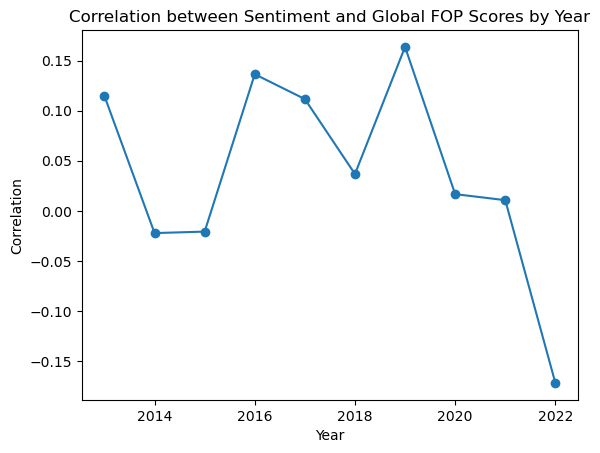

In [46]:
# Calculate correlation for each year
correlations_by_year2 = merged_df2.groupby('year')[['sentiment', 'global_score']].corr().iloc[0::2,-1].reset_index()
correlations_by_year2.rename(columns={'global_score': 'correlation'}, inplace=True)

# Plotting
plt.plot(correlations_by_year2['year'], correlations_by_year2['correlation'], marker='o')
plt.xlabel('Year')
plt.ylabel('Correlation')
plt.title('Correlation between Sentiment and Global FOP Scores by Year')
plt.show()

In [47]:
# Print the correlation values for each year
print("Correlation between Sentiment and Global FOP Scores by Year:")
print(correlations_by_year2)

Correlation between Sentiment and Global FOP Scores by Year:
   year    level_1  correlation
0  2013  sentiment     0.114549
1  2014  sentiment    -0.022214
2  2015  sentiment    -0.020741
3  2016  sentiment     0.136313
4  2017  sentiment     0.111525
5  2018  sentiment     0.036726
6  2019  sentiment     0.163549
7  2020  sentiment     0.016656
8  2021  sentiment     0.010634
9  2022  sentiment    -0.171727


## Interpreting the Results

As we can observe from the outputs above, the overall correlation between the sentiment score and the global FOP score seems to be positive, indicating some kind of positive relationship (if the sentiment score rises over the years, then the FOP score does so as well). However, this correlation is 0.034, which is still very low. If we can say anything about the relationship with this score is hence uncertain. Perhaps more exploratory analysis is required to study the relationship between these variables. 

However, if we see the development of the correlations over the years, we definetely can see variations. For instance, in the year 2022, the sentiment score and corruption score have a negative correlation of -0.25, and in 2019, the sentiment and Global FOP score had a positive correlation of 0.16. Why could this be the case? 